In [2]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import datetime
import pandas as pd
import random as r
from scipy.optimize import curve_fit
import math
#import plotly.express as px

In [3]:
# Create the Voronoi cells given a set of agents
def Voronoi(agents):
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agents)**2, axis=1)
            closest = np.argmin(distances)
            if mission_space[y, x] != -2:
                if (distances[closest] <= Rs**2):
                    mission_space[y, x] = closest
                else:
                    mission_space[y, x] = -1
    return mission_space

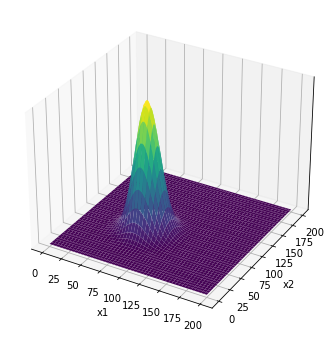

In [4]:
# Bivariate Gaussian pdf function
def pdf_creation(mx,my):
    plt.rcParams['figure.figsize'] = 14,6
    cov_val = 0                  # Covariance values
    mean = np.array([mx,my])     # Setting mean of the distribution to be at (mx,my)
    cov = np.array([[2, cov_val], [cov_val, 2]])*100
    # Generating a Gaussian bivariate distribution with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean, seed = 1000)
    x = np.linspace(0, 200, num=200)
    y = np.linspace(0, 200, num=200)
    X, Y = np.meshgrid(x,y)      # Return coordinate matrices from coordinate vectors
    # Generating the density function for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
    return X,Y,pdf
X,Y,pdf = pdf_creation(80,80)
ax = plt.figure().add_subplot(131, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.xlabel("x1")
plt.ylabel("x2")
ax.axes.zaxis.set_ticks([])
plt.tight_layout()
plt.show()

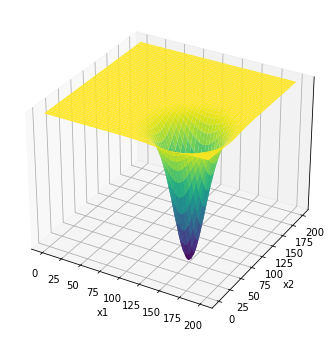

In [5]:
# Negative Bivariate Gaussian pdf function
a = 150
b = 50
cov_diag = 3
def pdf_creation_neg(a,b,cov_diag):       # aggiungere terzo input
    cov_val = 0
    mean = np.array([a,b])    # Setting mean of the distribution to be at (a,b)
    cov = np.array([[cov_diag, cov_val], [cov_val, cov_diag]])*100
    # Generating a Gaussian bivariate distribution with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean, seed = 1000)
    x = np.linspace(0, 200, num=200)
    y = np.linspace(0, 200, num=200)
    X, Y = np.meshgrid(x,y)     # Return coordinate matrices from coordinate vectors
    # Generating the density function for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
    return X,Y, -pdf
X,Y,pdf1 = pdf_creation_neg(a,b,cov_diag)
ax = plt.figure().add_subplot(131, projection = '3d')
ax.plot_surface(X, Y, pdf1 , cmap = 'viridis')
plt.xlabel("x1")
plt.ylabel("x2")
ax.axes.zaxis.set_ticks([])
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

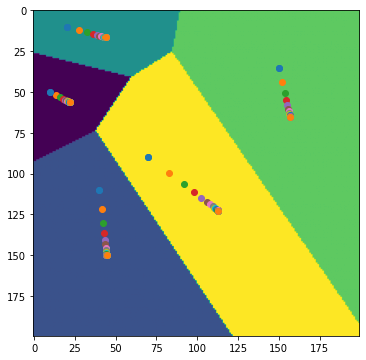

In [6]:
# Find geometrical centroids of the cells and move the agents to the centroids
K = 0.3 # Proportional Gain
mission_space = np.zeros((200, 200))                                    # space matrix
agents = np.array([[10, 50], [40, 110], [20, 10], [150, 35], [70, 90]]) # agents positions
for x in range(mission_space.shape[1]):
    for y in range(mission_space.shape[0]):
        # for every point
        point = np.array([x, y])
        # compute distance of point from every agent
        distances = np.sum((point - agents) ** 2, axis=1)
        # assign value based on closest agent
        mission_space[y, x] = np.argmin(distances) # return indices of the minimum values along one axis

def find_centroid(n):
    subspace = np.argwhere(mission_space == n)
    return subspace.mean(axis=0)

centroids = np.array([
    find_centroid(i) for i in range(agents.shape[0])])

# Move the agents to the centroid
for b in range(0, agents.shape[0]):          # for every agents
    goal = [centroids[b,1], centroids[b,0]]  # goal position
    p = np.zeros((50,2))                   
    i = 0
    p[0] = agents[b]                        # initial position 
    while np.all(p) != np.all(goal):        # while different positions
        u = p[i] - goal
        p[i+1] = p[i] - K*(u)               # proportional controller on position
        i = i + 1
    for x,y in p:                           # plot the updated positions
        plt.scatter(x,y)
        
plt.scatter(agents[:, 0], agents[:, 1])
plt.scatter(centroids[:, 1], centroids[:, 0])
plt.imshow(mission_space) 
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

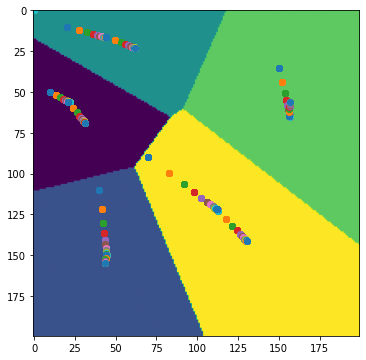

In [7]:
# Update the cells reaching a better coverage (move to the centroid multiple times)
for z in range(2):  # number of iterations
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            # for every point
            point = np.array([x, y])
            # compute distance of point from every agent
            distances = np.sum((point - agents)**2, axis=1)
            # assign value based on closest agent
            mission_space[y, x] = np.argmin(distances) # return indices of the minimum values along one axis

    centroids = np.array([find_centroid(i) for i in range(agents.shape[0])])

    for b in range(agents.shape[0]):            # for every agents
        goal = [centroids[b,1], centroids[b,0]] # goal position
        p = np.zeros((30,2))                    
        i = 0
        p[0] = agents[b]                        # initial position
        while np.all(p) != np.all(goal):        # while different positions
            u = p[i] - goal
            p[i+1] = p[i] - K*(u)               # proportional controller on position
            i = i + 1
            # if b==1:
            for x,y in p:                   # plot the updated positions
                plt.scatter(x,y)
        agents[b] = goal

plt.scatter(centroids[:,1], centroids[:,0])
plt.imshow(mission_space)
plt.show  

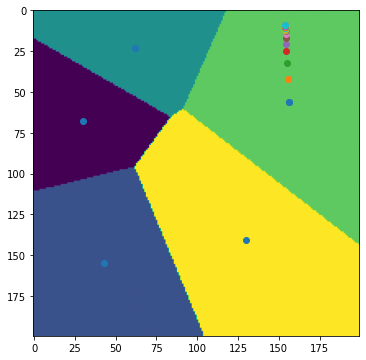

In [ ]:
# Move the closest agent to a random point in the mission space
import random as r
x_r = r.randint(0,mission_space.shape[0]) # create a random point in the mission space
y_r = r.randint(0,mission_space.shape[0])
p_r = [x_r,y_r]

for a in range(agents.shape[0]): # for every agent check if the point is in its cell (a) and break when you find it
    if mission_space[p_r[1]][p_r[0]] == a: 
        break  
p = np.zeros((150,2))
counter = 0
p[0] = agents[a]
while np.all(p) != np.all(p_r):  # move to the selected point
    u = p[counter] - p_r
    p[counter+1] = p[counter] - K*(u)
    counter = counter + 1
for x,y in p:
    plt.scatter(x,y)
plt.scatter(agents[:,0], agents[:,1])
plt.imshow(mission_space)
plt.show()

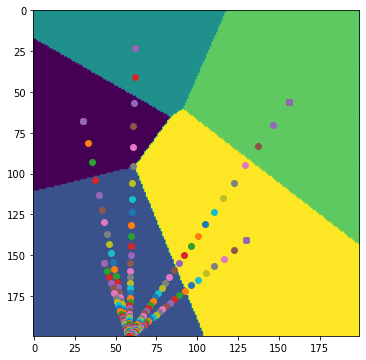

In [ ]:
# Convergence of all the agents to a random point
x_r = r.randint(0,mission_space.shape[0]) # create a random point in the mission space
y_r = r.randint(0,mission_space.shape[0])
p_r = [x_r,y_r]

for a in range(agents.shape[0]):
    p = np.zeros((50,2))
    counter = 0
    p[0] = agents[a]
    while np.all(p) != np.all(p_r):  # move to the selected point
        u = p[counter] - p_r
        p[counter+1] = p[counter] - 0.1*(u)
        counter = counter + 1
    for x,y in p:
        plt.scatter(x,y)
    plt.scatter(agents[:,0], agents[:,1])
    plt.imshow(mission_space)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

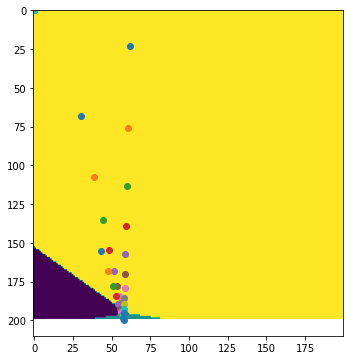

In [ ]:
# Update the cell and convergence to a random point of all the agents
goal = p_r
p0 = np.zeros((30,2))                    
p0[0] = agents[0]    
p1 = np.zeros((30,2))                    
p1[0] = agents[1]
p2 = np.zeros((30,2))                    
p2[0] = agents[2] 
i = 0
for z in range(10):                              # Iteration
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            # compute distance of point from every agent
            distances = np.sum((point - agents)**2, axis=1)
            # assign value based on closest agent
            mission_space[y, x] = np.argmin(distances) # return indices of the minimum values along one axis
    u0 = p0[i] - goal
    p0[i+1] = p0[i] - K*(u0)                     
    u1 = p1[i] - goal
    p1[i+1] = p1[i] - K*(u1)
    u2 = p2[i] - goal
    p2[i+1] = p2[i] - K*(u2)
    agents = [p0[i+1], p1[i+1], p2[i+1]]
    i = i+1
for x,y in p0:                           
    plt.scatter(x,y) 
for x,y in p1:                            
    plt.scatter(x,y)
for x,y in p2:                            
    plt.scatter(x,y)
plt.imshow(mission_space)
plt.scatter(p_r[0], p_r[1])
plt.show

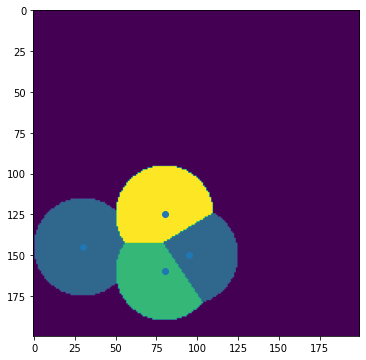

In [ ]:
# Limited sensing range: Rc > 2*Rs with communication range
mission_space = np.ones((200, 200))*(-1)
Rs = 30  # Sensing range
Rc = 50  # Communication range
agents = np.array([[95, 150], [80, 160], [30, 145], [80, 125]])
# Agents interdistance
d = cdist(agents,agents)  # distances between agents, symmetric matrix, diagonal=0
agent0, agent1, agent2, agent3 = [],[],[],[]

for r in range(agents.shape[0]):
    for t in range(agents.shape[0]):
        if d[r][t] <= Rc: # Create the communication range arrays
            if r==0: agent0.append(agents[t])
            if r==1: agent1.append(agents[t])
            if r==2: agent2.append(agents[t])
            if r==3: agent3.append(agents[t])
agent_i = [agent0, agent1, agent2, agent3]

for a in range(len(agent_i)):                # Compute the Voronoi cells for each agent taking into account the communication range limitation
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agent_i[a])**2, axis=1)
            closest = np.argmin(distances)
            if (distances[closest] < Rs**2):
                mission_space[y, x] = closest

plt.imshow(mission_space, cmap="viridis")
plt.scatter(agents[:,0], agents[:,1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

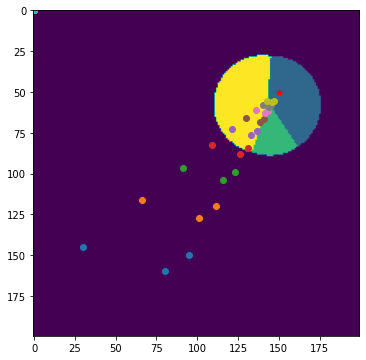

In [ ]:
# Limited sensing range + move to a point updating the cells
mission_space = np.ones((200, 200))*(-1)
agents = np.array([[95, 150], [80, 160], [30, 145], [80, 125]])
goal = [150,50]
p0 = np.zeros((30,2))                    
p0[0] = agents[0]    
p1 = np.zeros((30,2))                    
p1[0] = agents[1]
p2 = np.zeros((30,2))                    
p2[0] = agents[2] 
i = 0
for z in range(8):
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agents)**2, axis=1)
            closest = np.argmin(distances)
            if (distances[closest] < Rs**2):
                mission_space[y, x] = closest
            else:
                mission_space[y, x] = -1
    u0 = p0[i] - goal
    p0[i+1] = p0[i] - K*(u0)                     
    u1 = p1[i] - goal
    p1[i+1] = p1[i] - K*(u1)
    u2 = p2[i] - goal
    p2[i+1] = p2[i] - K*(u2)
    agents = [p0[i+1], p1[i+1], p2[i+1]]
    i = i+1

for x,y in p0:                           
    plt.scatter(x,y) 
for x,y in p1:                            
    plt.scatter(x,y)
for x,y in p2:                            
    plt.scatter(x,y)
plt.imshow(mission_space)
plt.scatter(goal[0], goal[1], color="red", marker="*")
plt.show

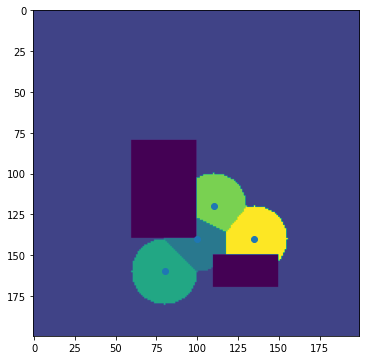

In [ ]:
# Obstacle avoidance - static
mission_space = np.ones((200, 200))*(-1)
agents = np.array([[100, 140], [80, 160], [110, 120], [135, 140]])
Rs = 20
mission_space[80:140, 60:100] = -2    # Obstacle creation
mission_space[150:170, 110:150] = -2

for x in range(mission_space.shape[1]):     # Creation of the Voronoi cells
    for y in range(mission_space.shape[0]):
        point = np.array([x, y])
        distances = np.sum((point - agents)**2, axis=1)
        closest = np.argmin(distances)
        if mission_space[y, x] != -2:
            if (distances[closest] > Rs**2):
                mission_space[y, x] = -1
            else:
                mission_space[y, x] = closest
plt.imshow(mission_space, cmap="viridis")
plt.scatter(agents[:,0], agents[:,1])
plt.show()

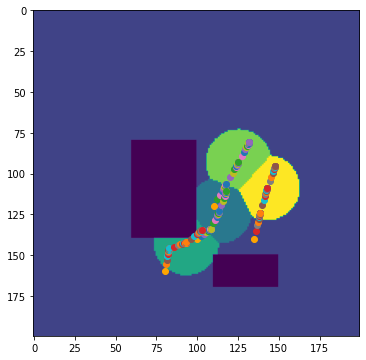

In [ ]:
# Centroids with mass distribution in order to reach a desired position
agents = np.array([[100, 140], [80, 160], [110, 120], [135, 140]])
Rs = 20
plt.scatter(agents[:,0], agents[:,1], color="orange")
_,_,pdf = pdf_creation(150,50)

for t in range(3):
    mission_space = np.ones((200, 200))*(-1)
    mission_space[80:140, 60:100] = -2    # Obstacle
    mission_space[150:170, 110:150] = -2
    centroids = np.zeros((4,2))
    for x in range(mission_space.shape[1]):  # Create the Voronoi cells
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agents)**2, axis=1)
            closest = np.argmin(distances)
            if mission_space[y, x] != -2:
                if (distances[closest] < Rs**2):
                    mission_space[y, x] = closest
    for n in range(agents.shape[0]):         # Compute the centroids
        cell = np.argwhere(mission_space==n) # indices
        M = xcm = ycm = 0
        for i,j in cell:
            xcm = xcm + pdf[i, j]*i          # Exploit the bivariate Gaussian pdf
            ycm = ycm + pdf[i, j]*j
            M = M + pdf[i, j]
        Cx = xcm/M     # Centroid
        Cy = ycm/M
        C = [[Cx,Cy]]

        if mission_space[round(Cx),round(Cy)] == -2: # Centroid Obstacle avoidance, move the centroid outside the obstacle if it falls inside
            dis = cdist(C, cell)
            close = np.argmin(dis)
            Cx = cell[close,0]
            Cy = cell[close,1]
        centroids[n] = np.array([Cy,Cx])
        plt.scatter(Cy,Cx, color="red", marker="*")
        
    p = np.zeros((100,1,agents.shape[0],2))                   
    i = 0
    p[0] = agents                                  # initial position 
    while np.all(p[i][0]) == np.all(centroids):    # while different positions
        u = p[i] - centroids
        p[i+1] = p[i] - K*u                        # proportional controller on position
        i = i + 1
        if i == p.shape[0]-1:
            break
        for x, y in p[i][0]:
            plt.scatter(x,y)
    agents = centroids
plt.imshow(mission_space, cmap="viridis")
plt.show()

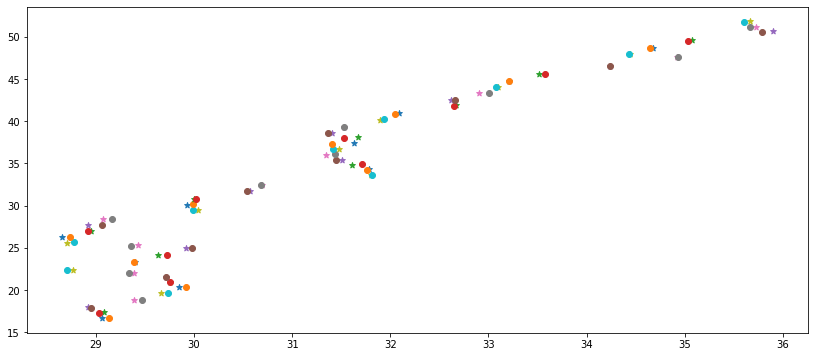

In [ ]:
# Kalman filter - dynamic, for position estimation
H = np.array([[[1,0],[0,1]]]) # Sensor
H_k = H.reshape(2,2)
Sigma = np.array([[0.1], [0.05]])
p = np.array([[np.random.randint(1,100)],[np.random.randint(1,100)]])  # random point
n = 50                            # number of measurements
p_Kest = np.zeros((len(p), 1))    # Position estimate
P_Kest = np.diag([10**2, 10**2])  # Estimated uncertainty - initialize covariance
# Dynamic matrices
A = np.identity(2)
B = np.identity(2)  # input matrix
ux = 0.1
uy = 0.7
u = np.array([[ux], [uy]])
G = np.array([[2], [1]]) # matrix of the uncertainties
ModelNoiseSigma = 0.2

for k in range (n):
    # Dynamic
    p = A@p + B@u + G*np.random.randn(1)*ModelNoiseSigma # add a Gaussian random noise with zero mean
    # Measurements
    Z = H_k@p + np.random.randn(np.size(H_k,1),1)*Sigma
    C = np.diag([0.1**2,0.05**2])   # covariance matrix of the noise (Sigma**2)
    # Prediction step for the state and the covariance matrix
    p_Kest_pred = A@p_Kest + B@u
    P_Kest_pred = A@P_Kest@np.transpose(A) + G*ModelNoiseSigma**2@np.transpose(G)
    # Update step (same as WLS)
    S = H_k @ P_Kest_pred @ np.transpose(H_k) + C
    W = P_Kest_pred @ np.transpose(H_k) @ np.linalg.inv(S)
    p_Kest = p_Kest_pred + W @ (Z - H_k @ p_Kest_pred)
    P_Kest = (np.identity(2) - W @ H_k) @ P_Kest_pred
    # Kalman position
    PointModK = np.transpose(p_Kest)
    plt.scatter(PointModK[0][0], PointModK[0][1], marker='*')
    # Actual position
    PointMod = np.transpose(p)
    plt.scatter(PointMod[0][0], PointMod[0][1]) 
    #plt.scatter(PointMod[0][0]-PointModK[0][0], PointMod[0][1]-PointModK[0][1])  
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

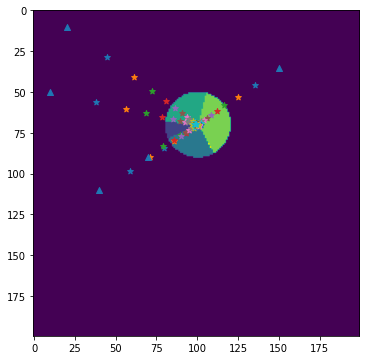

In [ ]:
# Controller with Kalman filter, multiple agents + load the cells every iteration
p1 = agents = np.array([[10, 50], [40, 110], [20, 10], [150, 35], [70, 90]])
goal = np.array([[100, 70], [100, 70], [100, 70], [100, 70], [100, 70]])  # goal position
mission_space = np.ones((200,200))*(-1)
K = 0.3
p_Kest = np.zeros((len(p1), 2))
P_Kest = np.diag([10**2, 10**2, 10**2, 10**2, 10**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(5)
Sigma = np.array([[0.05,0.05],[0.05,0.05],[0.05,0.05],[0.05,0.05],[0.05,0.05]])
# Dynamic matrices
A = np.identity(5)
B = np.identity(5)  # input matrix
G = np.array([[2,1],[2,1],[2,1],[2,1],[2,1]])
Z = np.zeros((5,2))
C = np.zeros((5,5))
P_Kest_pred = np.zeros((5,5))
p_Kest_pred = np.zeros((5,2))
S = np.zeros((5,5))
W = np.zeros((5,5))
ModelNoiseSigma = 0.3

for i in range(20):
    mission_space = Voronoi(p1)
    u = -K*(p1 - goal) 
    # Dynamic
    p = A@p1 + B@u + G*np.random.randn(1)*ModelNoiseSigma
    # Measurements
    Z = H_k@p + np.random.randn(np.size(H_k,1),1)*Sigma
    C = np.diag([0.05**2,0.05**2,0.05**2,0.05**2,0.05**2])   # covariance matrix of the noise
    # Prediction step
    p_Kest_pred = A@p_Kest + B@u
    P_Kest_pred = A@P_Kest@np.transpose(A) + G*ModelNoiseSigma**2@np.transpose(G)
    # Update step (same as WLS)
    S = H_k @ P_Kest_pred @ np.transpose(H_k) + C
    W = P_Kest_pred @ np.transpose(H_k) @ np.linalg.inv(S)
    p_Kest = p_Kest_pred + W @ (Z - H_k @ p_Kest_pred)
    P_Kest = (np.identity(5) - W @ H_k) @ P_Kest_pred
    # Kalman position
    p1 = p_Kest
    Point1Modk = np.transpose(p1)
    plt.scatter(Point1Modk[:][0], Point1Modk[:][1], marker='*')
plt.scatter(agents[:, 0], agents[:, 1],marker = '^')
plt.imshow(mission_space)
plt.show

Target: x = 140, y = 60
Agent 1 position: x = 132.1459, y = 55.198
Founded target: x = 140, y = 60


<function matplotlib.pyplot.show(close=None, block=None)>

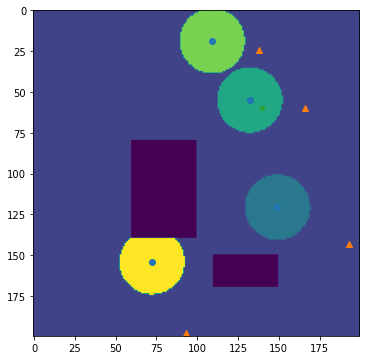

In [ ]:
# Random search Task: 1. Search a random point with multiple agents (without communication range) - first step
import random as ra
K = 0.3
mission_space = np.ones((200, 200))*(-1)
p = agents = np.array([[10,50],[25,40],[18,3],[7,15]])
Rs = 20
mission_space[80:140, 60:100] = -2    # Obstacle
mission_space[150:170, 110:150] = -2
target = np.array([140,60])
random_forest = np.argwhere(mission_space==-1)
goal = np.zeros((4,2))

for i in range(3):
    picker = ra.sample(range(0, len(random_forest)-1), 4)
    for i in range(agents.shape[0]):
        goal[i] = [random_forest[picker[i]][1], random_forest[picker[i]][0]]
    found = False
    for k in range(15):  # move to the selected point
        u = p - goal
        p = p - K*u
        mission_space = Voronoi(p)
        for r in range(agents.shape[0]):          # search in the cell of every agent
            cell = np.argwhere(mission_space==r)
            for j,i in cell:
                if i == target[0] and j == target[1] and found == False:
                    print(f"Target: x = {target[0]}, y = {target[1]}")
                    print(f"Agent {r} position: x = {p[r,0]}, y = {p[r,1]}")
                    print(f"Founded target: x = {i}, y = {j}")
                    agn = r # agent that found the target
                    found = True
                    break
            if found: break
        if found: break
    plt.scatter(p[:,0],p[:,1])
    plt.scatter(goal[:,0],goal[:,1], marker='^')
    if found: break
plt.scatter(target[0], target[1], marker='*') 
plt.imshow(mission_space)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

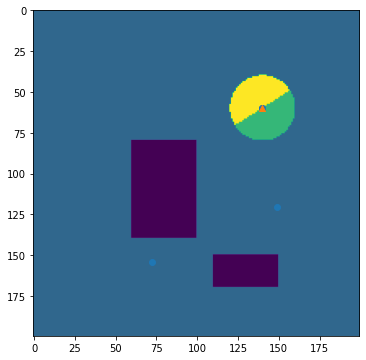

In [ ]:
# 2. Add communication range to the task, all the agent must go to the founded target - second step
if found:
    Rc = 60         # Communication range
    d = cdist(p,p)  # Agents interdistance
    agent0, agent1, agent2, agent3 = [],[],[],[]
    for r in range(agents.shape[0]):
        for t in range(agents.shape[0]):
            if d[r][t] <= Rc:
                if r==0: agent0.append(p[t])
                if r==1: agent1.append(p[t])
                if r==2: agent2.append(p[t])
                if r==3: agent3.append(p[t])
    agent_i = [agent0, agent1, agent2, agent3]
    goalf = target                        # set the target
    for s in range(len(agent_i[agn])):    # check in the communication range of the agent that found the target
        for q in range(agents.shape[0]):  # if there are other agentsin the communication range, save their index
            if agent_i[agn][s][0] == p[q][0] and agent_i[agn][s][1] == p[q][1]: # q = agent number
                for k in range(15):       # all the agents q, move them to the target toghether with the agents in the communication range
                    u = p[q] - goalf
                    p[q] = p[q] - K*u
    mission_space = Voronoi(agent_i[agn])
    plt.scatter(p[:,0],p[:,1])
    plt.scatter(goalf[0],goalf[1], marker='^')
plt.imshow(mission_space)
plt.show

In [ ]:
# Obstacle avoidance function with potential fields
def centroids_avoidance_4(n,pdf,Rs,cov_diag):
    cell = np.argwhere(mission_space==n) # indices
    xcm = ycm = 0
    M = 1e-50
    for i,j in cell:
        xcm = xcm + pdf[i, j]*i
        ycm = ycm + pdf[i, j]*j
        M = M + pdf[i, j]
    Cx = xcm/M     # Centroid
    Cy = ycm/M
    C = [[Cx,Cy]] 
    if np.min(cdist(C, np.argwhere(mission_space == -2))) <= 0.95 * Rs  : # Centroid Obstacle avoidance
        dis = cdist(C, cell)
        close = np.argmin(dis)
        Cx = cell[close,0]
        Cy = cell[close,1]
        _,_,pdf1 = pdf_creation_neg(Cy,Cx,cov_diag)
        
        pdf = pdf + pdf1

        cell = np.argwhere(mission_space==n) # indices
        M = xcm = ycm = 0
        for i,j in cell:
            xcm = xcm + pdf[i, j]*i
            ycm = ycm + pdf[i, j]*j
            M = M + pdf[i, j]
        Cx = xcm/M     # Centroid
        Cy = ycm/M
        
    centroids[n] = np.array([Cy,Cx])
    return centroids[n], pdf

Target: x = 140, y = 60
Agent 2 position: x = 117.04107846215712, y = 51.509097348763234
Founded target: x = 140, y = 60


<function matplotlib.pyplot.show(close=None, block=None)>

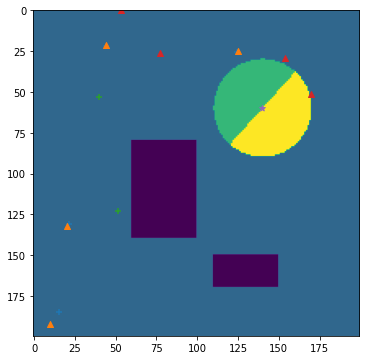

In [ ]:
# Random search Task complete: Search a random point with 4 agents and obstacle avoidance algorithm implemented (it takes a long time to run)
K = 0.3
mission_space = np.ones((200, 200))*(-1)
p = agents = np.array([[10,50],[25,40],[18,3],[7,15]])
Rs = 30
Rc = 70
cov_diag = 1
mission_space[80:140, 60:100] = -2    # Obstacles
mission_space[150:170, 110:150] = -2
target = np.array([140,60])           # Unknown point
random_forest = np.argwhere(mission_space==-1)

for i in range(2):
    goal = []
    picker = ra.sample(range(0, len(random_forest)-1), len(p)) # a random point for every agent
    for i in range(p.shape[0]):
        goal.append([random_forest[picker[i]][1], random_forest[picker[i]][0]]) # goals of every agent at the current iteration
    goal = np.array(goal)
    centroids = np.zeros((len(p),2))
    mission_space = Voronoi(p)
    found = False
    finish = False
    for s in range(30):
        for n in range(p.shape[0]):
            _,_,pdf = pdf_creation(goal[n][0],goal[n][1])
            centroids[n],pdf = centroids_avoidance_4(n,pdf,Rs,cov_diag) # compute the centroids

        for k in range(15):  # move to the selected points
            u = p - centroids
            p = p - K*u
            mission_space = Voronoi(p)           # compute the Voronoi cell at every step
            for r in range(p.shape[0]):          # search in the cell of every agent at every step
                cell = np.argwhere(mission_space == r) 
                for j,i in cell:                 # search in the sensing range of every agent
                    if i == target[0] and j == target[1] and found == False:
                        print(f"Target: x = {target[0]}, y = {target[1]}")
                        print(f"Agent {r} position: x = {p[r,0]}, y = {p[r,1]}")
                        print(f"Founded target: x = {i}, y = {j}")
                        agn = r       # agent that found the target
                        found = True  # Set the flag to true if founded
                        break
                if found: break       # exit the search loop
            if found: break
        if found: break

    if found:                                # If the target is found:
        d = cdist(p,p)                       # Agents interdistance
        agent0, agent1, agent2, agent3 = [],[],[],[]
        for r in range(p.shape[0]):          # compute the communication ranges of every agent
            for t in range(p.shape[0]):
                if d[r][t] <= Rc:
                    if r==0: agent0.append(p[t])
                    if r==1: agent1.append(p[t])
                    if r==2: agent2.append(p[t])
                    if r==3: agent3.append(p[t])
        agent_i = [agent0, agent1, agent2, agent3]
        goalf = target    # set the target

        for s in range(len(agent_i[agn])):    # check in the communication range of the agent that found the target
            for q in range(p.shape[0]):       # if there are other agents in the communication range, move them to the target too
                if agent_i[agn][s][0] == p[q][0] and agent_i[agn][s][1] == p[q][1]: # q = agent number
                    for k in range(20):       # move all the agents in the communication range to the target
                        u = p[q] - goalf
                        p[q] = p[q] - K*u
        mission_space = Voronoi(agent_i[agn])
        
        # Modify p in order to move randomly only the agents outside the communication range till they found the target
        p1 = []
        for e in range(p.shape[0]):           # select all the agents that are still not on the target
            if round(p[e][0]) != goalf[0] and round(p[e][1]) != goalf[1]:
                p1.append(p[e])
        if not p1:        # If p1 is empty all the agents are on the target => finish
            finish = True
        p = np.array(p1)
    if finish:
        print("All the agents found the target => Exit")
        break
    plt.scatter(p[:,0],p[:,1], marker='+')       # agents position
    plt.scatter(goal[:,0],goal[:,1], marker='^') # searched goal positions
plt.scatter(target[0], target[1], marker='*')    # final unknown target
plt.imshow(mission_space)
plt.show

Target: x = 140, y = 60
Agent 3 position: x = 125.53776105679134, y = 49.34350401803168
Founded target: x = 140, y = 60
Target: x = 140, y = 60
Agent 0 position: x = 135.6242584532595, y = 65.83016011048146
Founded target: x = 140, y = 60
Target: x = 140, y = 60
Agent 1 position: x = 121.09479571588459, y = 52.00140123231118
Founded target: x = 140, y = 60
Target: x = 140, y = 60
Agent 0 position: x = 151.94556305887684, y = 52.01693081119927
Founded target: x = 140, y = 60
All the agents found the target => Exit


<function matplotlib.pyplot.show(close=None, block=None)>

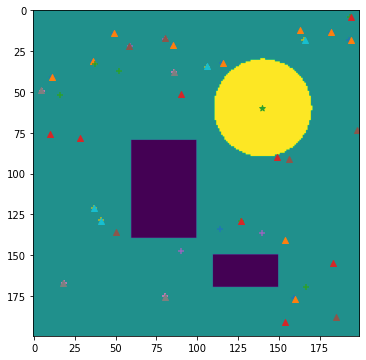

In [ ]:
# Random search Task: Search a random point with 6 agents and augmented sensing range without obstacle avoidance (used to evaluate the performances of the algorithm)
K = 0.3
mission_space = np.ones((200, 200))*(-1)
p = agents = np.array([[10,50],[25,40],[18,3],[7,15],[20,45],[10,10]])
Rs = 30
Rc = 60
mission_space[80:140, 60:100] = -2    # Obstacles
mission_space[150:170, 110:150] = -2
target = np.array([140,60])           # Unknown point
random_forest = np.argwhere(mission_space==-1)

for i in range(20):
    goal = []
    picker = ra.sample(range(0, len(random_forest)-1), len(p)) # a random point for every agent
    for i in range(p.shape[0]):
        goal.append([random_forest[picker[i]][1], random_forest[picker[i]][0]]) # goals of every agent at the current iteration
    goal = np.array(goal)
    found = False
    finish = False

    for k in range(15):  # move to the selected point
        u = p - goal
        p = p - K*u
        mission_space = Voronoi(p)           # compute the Voroni cell at every step
        for r in range(p.shape[0]):          # search in the cell of every agent at every step
            cell = np.argwhere(mission_space == r) 
            for j,i in cell:                 # search in the sensing range of every agent
                if i == target[0] and j == target[1] and found == False:
                    print(f"Target: x = {target[0]}, y = {target[1]}")
                    print(f"Agent {r} position: x = {p[r,0]}, y = {p[r,1]}")
                    print(f"Founded target: x = {i}, y = {j}")
                    agn = r       # agent that found the target
                    found = True  # Set the flag to true if founded
                    break
            if found: break       # exit the search loop
        if found: break

    if found:
        d = cdist(p,p)                       # Agents interdistance
        agent0, agent1, agent2, agent3, agent4, agent5 = [],[],[],[],[],[]
        for r in range(p.shape[0]):          # compute the communication ranges of every agent
            for t in range(p.shape[0]):
                if d[r][t] <= Rc:
                    if r==0: agent0.append(p[t])
                    if r==1: agent1.append(p[t])
                    if r==2: agent2.append(p[t])
                    if r==3: agent3.append(p[t])
                    if r==4: agent4.append(p[t])
                    if r==5: agent5.append(p[t])
        agent_i = [agent0, agent1, agent2, agent3, agent4, agent5]
        goalf = target    # set the target

        for s in range(len(agent_i[agn])):    # check in the communication range of the agent that found the target
            for q in range(p.shape[0]):       # if there are other agents in the communication range, move them to the target too
                if agent_i[agn][s][0] == p[q][0] and agent_i[agn][s][1] == p[q][1]: # q = agent number
                    for k in range(15):       # move all the agents in the communication range to the target
                        u = p[q] - goalf
                        p[q] = p[q] - K*u
        mission_space = Voronoi(agent_i[agn])
        
        # Modify p in order to move randomly only the agents outside the communication range till they found the target
        p1 = []
        for e in range(p.shape[0]):           # select all the agents that are still not on the target
            if round(p[e][0]) != goalf[0] and round(p[e][1]) != goalf[1]:
                p1.append(p[e])
        if not p1:        # If p1 is empty all the agents are on the target => finish
            finish = True
        p = np.array(p1)
    if finish:
        print("All the agents found the target => Exit")
        break
    plt.scatter(p[:,0],p[:,1], marker='+')       # agents position
    plt.scatter(goal[:,0],goal[:,1], marker='^') # searched goal positions
plt.scatter(target[0], target[1], marker='*')    # final unknown target
plt.imshow(mission_space)
plt.show

In [ ]:
# Compute the centroids exploiting a bivariate Gaussian pdf in the target -- first try, sometimes the trajectory cuts the angles of the obstacles
def centroids_avoidance_1(n, pdf):
    cell = np.argwhere(mission_space==n) # indices
    M = xcm = ycm = 0
    for i,j in cell:
        xcm = xcm + pdf[i, j]*i
        ycm = ycm + pdf[i, j]*j
        M = M + pdf[i, j]
    Cx = xcm/M     # Centroid
    Cy = ycm/M
    C = [[Cx,Cy]]
    if mission_space[round(Cx),round(Cy)] == -2 <= 3: # Centroid Obstacle avoidance to move the centroid outside the obstacle if it falls inside
        dis = cdist(C, cell)
        close = np.argmin(dis)
        Cx = cell[close,0]
        Cy = cell[close,1]
    centroids[n] = np.array([Cy,Cx])
    return centroids[n]

In [ ]:
# Compute the centroids exploiting a bivariate Gaussian pdf in the target and recalculating the path when too close to an obstacle
def centroids_avoidance_2(n, pdf):
    cell = np.argwhere(mission_space==n) # indices
    M = xcm = ycm = 0
    for i,j in cell:
        xcm = xcm + pdf[i, j]*i
        ycm = ycm + pdf[i, j]*j
        M = M + pdf[i, j]
    Cx = xcm/M     # Centroid
    Cy = ycm/M
    C = [[Cx,Cy]]
    if np.min(cdist(C, np.argwhere(mission_space == -2))) <= 5: # Centroid Obstacle avoidance
        dis = cdist(C, cell)
        close = np.argmin(dis) 
        longer = np.argmax(dis)
        medium = round(abs(close - (abs(longer - close)/2)))
        Cx = cell[medium,0]
        Cy = cell[medium,1] 
    centroids[n] = np.array([Cy ,Cx])
    return centroids[n]

<function matplotlib.pyplot.show(close=None, block=None)>

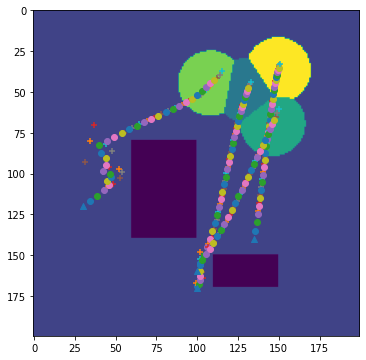

In [ ]:
# Static Obstacle avoidance
K = 0.3
Rs = 20
p = agents = np.array([[100, 160], [100, 170], [30, 120], [135, 140]])
_,_,pdf = pdf_creation(150,30)
mission_space = np.ones((200,200))*(-1)
mission_space[80:140, 60:100] = -2    # Obstacle
mission_space[150:170, 110:150] = -2
mission_space = Voronoi(p)

for k in range(30):
    centroids = np.zeros((4,2))
    mission_space = Voronoi(p)
    for n in range(agents.shape[0]):
        centroids[n] = centroids_avoidance_2(n,pdf)
    u = p - centroids
    p = p - K*u
    plt.scatter(p[:,0], p[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+')
plt.scatter(agents[:,0], agents[:,1], marker='^')   
plt.imshow(mission_space)
plt.show

In [ ]:
def Voronoi_noise(Rs,agents,var_laser): # Voronoi for multiple agents with added noise on the computation of the cells
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agents)**2, axis=1)
            distances = distances + np.random.randn(4)* var_laser
            closest = np.argmin(distances)
            if mission_space[y, x] != -2:
                if (distances[closest] <= Rs**2):
                    mission_space[y, x] = closest
                else:
                    mission_space[y, x] = -1
    return mission_space

In [ ]:
def Voronoi1(Rs,agents,var_laser): # Voronoi partition for one agent
    for x in range(mission_space.shape[1]):
        for y in range(mission_space.shape[0]):
            point = np.array([x, y])
            distances = np.sum((point - agents)**2, axis=1)
            distances = distances - np.random.randn(1)* var_laser
            closest = np.argmin(distances)
            if mission_space[y, x] != -2:
                if (distances[closest] <= Rs**2):
                    mission_space[y, x] = closest
                else:
                    mission_space[y, x] = -1
    return mission_space

In [ ]:
# Kalman filter function
def Kalman_filter(u,p1,p_Kest,P_Kest):
    # Dynamic
    p = A@p1 + B@u + G*np.random.randn(1)*ModelNoiseSigma
    pm = p
    # Measurements
    Z = H_k@p + np.random.randn(np.size(H_k,1),1)*Sigma
    C = np.diag([Sensor_sigma**2,Sensor_sigma**2,Sensor_sigma**2,Sensor_sigma**2])   # covariance matrix of the noise
    # Prediction step
    p_Kest_pred = A@p_Kest + B@u
    P_Kest_pred = A@P_Kest@np.transpose(A) + G*ModelNoiseSigma**2@np.transpose(G)
    # Update step (same as WLS)
    S = H_k @ P_Kest_pred @ np.transpose(H_k) + C
    W = P_Kest_pred @ np.transpose(H_k) @ np.linalg.inv(S)
    p_Kest = p_Kest_pred + W @ (Z - H_k @ p_Kest_pred)
    P_Kest = (np.identity(4) - W @ H_k) @ P_Kest_pred
    # Kalman position
    p1 = p_Kest
    return p1,p_Kest,P_Kest, p_Kest_pred, P_Kest_pred,pm,W,S

In [ ]:
# Kalman filter function for one agent
def Kalman_filter1(u,p1,p_Kest,P_Kest):
    # Dynamic
    p = A@p1 + B@u + G*np.random.randn(1)*ModelNoiseSigma
    pm = p
    # Measurements
    Z = H_k@p + np.random.randn(np.size(H_k,1),1)*Sigma
    pc = Z
    C = np.diag([Sensor_sigma**2])   # covariance matrix of the noise
    # Prediction step
    p_Kest_pred = A@p_Kest + B@u
    P_Kest_pred = A@P_Kest@np.transpose(A) + G*ModelNoiseSigma**2@np.transpose(G)
    # Update step (same as WLS)
    S = H_k @ P_Kest_pred @ np.transpose(H_k) + C
    W = P_Kest_pred @ np.transpose(H_k) @ np.linalg.inv(S)
    p_Kest = p_Kest_pred + W @ (Z - H_k @ p_Kest_pred)
    P_Kest = (np.identity(1) - W @ H_k) @ P_Kest_pred
    # Kalman position
    p1 = p_Kest
    return p1,p_Kest,P_Kest, p_Kest_pred, P_Kest_pred,pm,W,S,pc

In [ ]:
# Obstacle avoidance between agents function 
def centroids_avoidance_5(n,pdf,Rs,cor_var):
    cor_var
    pdf = pdf
    cell = np.argwhere(mission_space==n) # indices
    M = xcm = ycm = 0
    for i,j in cell:
        xcm = xcm + pdf[i, j]*i
        ycm = ycm + pdf[i, j]*j
        M = M + pdf[i, j]
    Cx = xcm/M     # Centroid
    Cy = ycm/M
    C = [[Cx,Cy]]   
                           
    if np.min(cdist(C, np.argwhere(mission_space != -1))) <= 0.95 * Rs  : # Centroid Obstacle avoidance
        dis = cdist(C, cell)
        close = np.argmin(dis)
        Cx = cell[close,0]
        Cy = cell[close,1]
        _,_,pdf1 = pdf_creation_neg(Cy,Cx,cor_var)
        
        pdf = pdf + pdf1
        
        cell = np.argwhere(mission_space==n) # indices
        M = xcm = ycm = 0
        for i,j in cell:
            xcm = xcm + pdf[i, j]*i
            ycm = ycm + pdf[i, j]*j
            M = M + pdf[i, j]
        Cx = xcm/M     # Centroid
        Cy = ycm/M
        
    centroids[n] = np.array([Cy ,Cx])
    return centroids[n], pdf

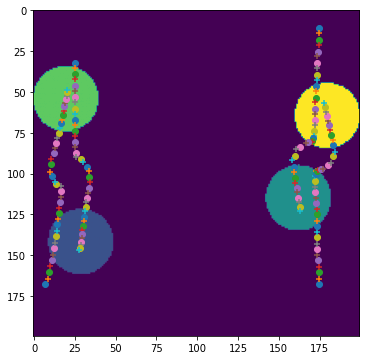

In [ ]:
# Dynamic obstacle avoidance between agents
K = 0.7
p = agents =  np.array([[25, 25], [175, 3], [3, 175], [175, 175]])
Sensor_sigma = 0.05
var_laser = 0.05
_,_,pdf = pdf_creation(150,175)
p_Kest = np.zeros((len(p), 2))
P_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(4)
Sigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma
# Dynamic matrices
A = np.identity(4)
B = np.identity(4)  # input matrix
G = np.array([[1,1],[1,1],[1,1],[1,1]])
Z = np.zeros((4,2))
C = np.zeros((4,4))
P_Kest_pred = np.zeros((4,4))
p_Kest_pred = np.zeros((4,2))
S = np.zeros((4,4))
W = np.zeros((4,4))
ModelNoiseSigma = 0.05
cor_var = 1
mission_space = np.ones((200, 200))*(-1)
iteration = 1
Rs = 20

for k in range(20):
    mission_space = Voronoi_noise(Rs,p,var_laser)
    centroids = np.zeros((4,2))
    for n in range(agents.shape[0]):
        if   n == 0:
            _,_,pdf = pdf_creation(25,175)
        elif n == 1:
            _,_,pdf = pdf_creation(175,175)
        elif n == 2:
            _,_,pdf = pdf_creation(25,25)
        elif n == 3:
            _,_,pdf = pdf_creation(175,25)
        centroids[n],pdf = centroids_avoidance_5(n,pdf,Rs,cor_var)

    for i in range (iteration):
        u = - K * (p - centroids)
        p,p_Kest,P_Kest,P_Kest_pred,p_Kest_pred,pm,W,S = Kalman_filter(u,p,p_Kest,P_Kest)
    
    plt.scatter(p[:,0], p[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+')
plt.imshow(mission_space)
plt.show()

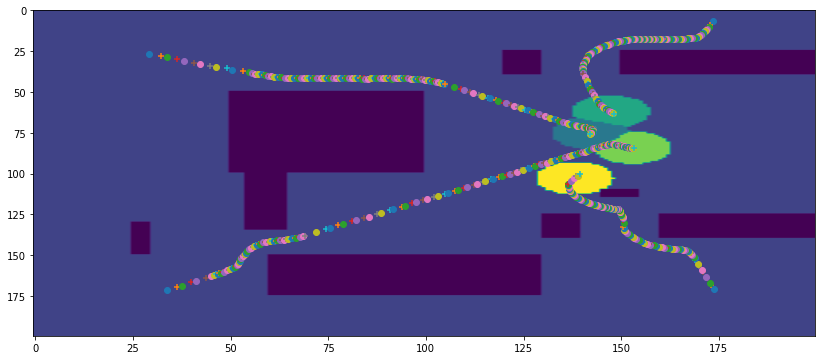

In [ ]:
# Test code for the avoidance algorithms
K = 0.6
p = agents =  np.array([[25, 25], [175, 3], [30, 175],[175, 175]])
Sensor_sigma = 0.05
var_laser = 0.05
_,_,pdf = pdf_creation(150,175)
p_Kest = np.zeros((len(p), 2))
P_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(4)
Sigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma
# Dynamic matrices
A = np.identity(4)
B = np.identity(4)  # input matrix
G = np.array([[1,1],[1,1],[1,1],[1,1]])
Z = np.zeros((4,2))
C = np.zeros((4,4))
P_Kest_pred = np.zeros((4,4))
p_Kest_pred = np.zeros((4,2))
S = np.zeros((4,4))
W = np.zeros((4,4))
ModelNoiseSigma = 0.05

mission_space = np.ones((200, 200))*(-1)
mission_space[50:100,50:100] = -2
mission_space[130:150,25:30] = -2
mission_space[25:40,150:200] = -2
mission_space[25:40,120:130] = -2
mission_space[100:135,54:65] = -2
mission_space[150:175,60:130] = -2
mission_space[125:140,160:200] = -2
mission_space[125:140,130:140] = -2
mission_space[110:115,145:155] = -2

iteration = 1
Rs = 10
#achievement = abs(p - np.array([[150,80],[150,80],[150,80],[150,80]]))
cov_diag = 1

#while np.any(achievement >= 10):  # Loop for analyses 
for k in range(120):

    mission_space = Voronoi_noise(Rs,p,var_laser)
    centroids = np.zeros((4,2))
    for n in range(agents.shape[0]):
        _,_,pdf = pdf_creation(150,80)
        centroids[n],pdf = centroids_avoidance_4(n,pdf,Rs,cov_diag)

    for i in range (iteration):
        u = - K * (p - centroids)
        #p = p - K*u
        p,p_Kest,P_Kest,P_Kest_pred,p_Kest_pred,pm,W,S = Kalman_filter(u,p,p_Kest,P_Kest)
        
    #achievement = abs (p -  np.array([[150,80],[150,80],[150,80],[150,80]]))
    #print(pm - p_Kest)
    #print(achievement)
    #plt.figure(figsize = (5,5))
    plt.scatter(p[:,0], p[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+')
plt.imshow(mission_space,aspect = "auto")
plt.show()

[[-0.00255315 -0.00255315]]
[[-0.00038967 -0.00038967]]
[[0.05001612 0.05001612]]
[[0.0469842 0.0469842]]
[[-0.0290016 -0.0290016]]
[[0.04808984 0.04808984]]
[[0.02814338 0.02814338]]
[[-0.03756969 -0.03756969]]
[[-0.01424327 -0.01424327]]
[[-0.01023976 -0.01023976]]
[[0.00919262 0.00919262]]
[[0.00303949 0.00303949]]
[[-0.0328488 -0.0328488]]
[[0.00924027 0.00924027]]
[[-0.07418857 -0.07418857]]
[[0.05514088 0.05514088]]
[[-0.06515269 -0.06515269]]
[[0.00266207 0.00266207]]
[[-0.02808873 -0.02808873]]
[[-0.04398241 -0.04398241]]
[[0.04237965 0.04237965]]
[[0.01596758 0.01596758]]
[[0.02775225 0.02775225]]
[[-0.09995173 -0.09995173]]
[[-0.03433043 -0.03433043]]
[[-0.02376681 -0.02376681]]
[[-0.01384976 -0.01384976]]
[[-0.01421841 -0.01421841]]
[[-0.0039012 -0.0039012]]
[[-0.00655265 -0.00655265]]
[[0.02051681 0.02051681]]
[[0.02097267 0.02097267]]
[[-0.07564886 -0.07564886]]
[[0.02183839 0.02183839]]
[[0.00678068 0.00678068]]
[[0.01982532 0.01982532]]
[[0.0469136 0.0469136]]
[[0.023327

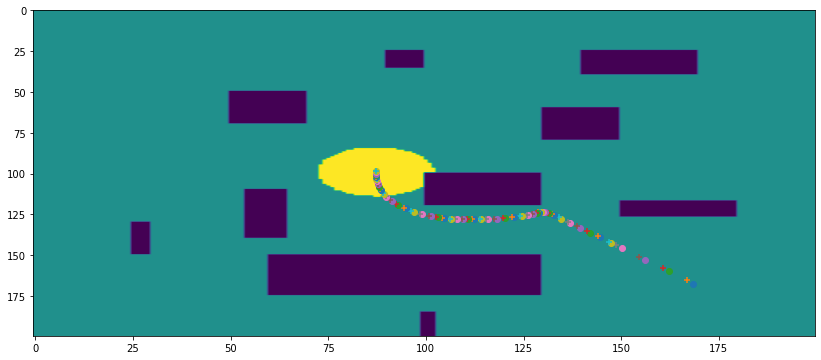

<Figure size 504x360 with 0 Axes>

'\nobs_data = pd.DataFrame()\nobs_data["Observed"] = VAR_STIM_OBS\nobs_data["Sensed"] = VAR_STIM_SENS\nplt.rcParams["font.family"] = "Times New Roman"\nplt.rc(\'font\',size = 16)\nplt.figure(figsize = (8,5.5))\nplt.plot(obs_data)\nplt.yticks(np.arange(0, 7, 0.5))\nplt.xlabel("Number of iteration",fontsize = 25)\nplt.ylabel("|Error|",fontsize = 25)\nplt.axhline(np.mean(VAR_STIM_OBS),linestyle = \'--\')\nplt.tight_layout()\nplt.legend(["Observed error","Sensed error",\'Observed mean error\'],prop={\'size\': 17,\'family\':\'Times New Roman\'})\n'

In [ ]:
# Example to retrieve and save performance data
# VECTOR GENERATION
#VAR_STIM_OBS = []
#VAR_STIM_SENS = []

K = 0.8
p = agents =  np.array([[175, 175]])
Sensor_sigma = 0.05
var_laser = 0.05
_,_,pdf = pdf_creation(150,175)
p_Kest = np.zeros((len(p), 2))
P_Kest = np.diag([70**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(1)
Sigma = np.array([[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma
# Dynamic matrices
A = np.identity(1)
B = np.identity(1)  # input matrix
G = np.array([[1,1]])
Z = np.zeros((1,2))
C = np.zeros((1,1))
P_Kest_pred = np.zeros((1,1))
p_Kest_pred = np.zeros((1,2))
S = np.zeros((1,1))
W = np.zeros((1,1))
ModelNoiseSigma = 0.05

mission_space = np.ones((200, 200))*(-1)
mission_space[50:70,50:70] = -2
mission_space[130:150,25:30] = -2
mission_space[25:40,140:170] = -2
mission_space[110:140,54:65] = -2
mission_space[150:175,60:130] = -2
mission_space[100:120,100:130] = -2
mission_space[60:80,130:150] = -2
mission_space[25:36,90:100] = -2
mission_space[117:127,150:180] = -2
mission_space[185:200,99:103] = -2

cov_diag = 1
iteration = 1
Rs = 15
achievement = abs(p -  np.array([[100,86]]))

for k in range(50):
    mission_space = Voronoi1(Rs,p,var_laser)
    centroids = np.zeros((4,2))
    for n in range(agents.shape[0]):
        _,_,pdf = pdf_creation(100,86)
        centroids[n],pdf = centroids_avoidance_4(n,pdf,Rs,cov_diag)

    for i in range (iteration):
        u = - K * (p - centroids)
        p,p_Kest,P_Kest,P_Kest_pred,p_Kest_pred,pm,W,S,pc = Kalman_filter1(u[0].reshape(1,2),p,p_Kest,P_Kest)
        
    achievement = abs (p - np.array([[100,86]]))
    print(pm - p_Kest)

    #VECTOR APPENDING
    #stimation_observed = abs(p_Kest - pm)
    #stimation_sensed = abs(p_Kest - pc)
    #VAR_STIM_OBS.append(stimation_observed[0][0])
    #VAR_STIM_SENS.append(stimation_sensed[0][0])
    plt.scatter(p[0,0], p[0,1])
    plt.scatter(centroids[0,0], centroids[0,1], marker='+')
plt.imshow(mission_space,aspect = "auto")
plt.figure(figsize = (7,5))
plt.show()

# LOADING AND PLOTTING
'''
obs_data = pd.DataFrame()
obs_data["Observed"] = VAR_STIM_OBS
obs_data["Sensed"] = VAR_STIM_SENS
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font',size = 16)
plt.figure(figsize = (8,5.5))
plt.plot(obs_data)
plt.yticks(np.arange(0, 7, 0.5))
plt.xlabel("Number of iteration",fontsize = 25)
plt.ylabel("|Error|",fontsize = 25)
plt.axhline(np.mean(VAR_STIM_OBS),linestyle = '--')
plt.tight_layout()
plt.legend(["Observed error","Sensed error",'Observed mean error'],prop={'size': 17,'family':'Times New Roman'})
'''

In [ ]:
'''
# Example of loading and analysing data (computational cost) - fitting (need a file to read)
data = pd.read_csv("SensRange-Time",index_col=False) # Read the file with data
df = pd.DataFrame()
data = data.astype(int)

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape *100

print(data.dtypes)
def exponential (x,a,b,c):
    """Fit function y=f(x,p) with parameters p=(a,b)"""
    return a*(b**x)+c

def f_upto_thirdorder (x,a,c,d):
    return a * x + c * x**3 + d

coeff_exp,cov_exp = curve_fit(exponential,data["Rs"],data["time"])
data["Timeintexp"] = exponential(data["Rs"],*coeff_exp)
df ["Timeintexp"] = exponential(np.arange(0,30),*coeff_exp)
coeff_third,cov_third = curve_fit(f_upto_thirdorder,data["Rs"],data["time"])
data["Timeintthird"] = f_upto_thirdorder (data["Rs"],*coeff_third)
df ["Timeintthird"] = f_upto_thirdorder (np.arange(0,30),*coeff_third)
rms = mape(data["time"],data["Timrintexp"])

plt.figure(figsize=(9,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font',size = 23)
plt.xlim(0,30)
plt.ylim(0,1000)
plt.ylabel("Processing Time [s]")
plt.xlabel("Sensing Range")
plt.plot(data["Rs"],data["time"])
plt.plot(np.arange(0,30),df["Timeintexp"])
plt.plot(np.arange(0,30),df["Timeintthird"])
plt.legend(["Calculated","exponential fit","Third order fit"])
'''

'\n# Example of loading and analysing data (computational cost) - fitting (need a file to read)\ndata = pd.read_csv("SensRange-Time",index_col=False) # Read the file with data\ndf = pd.DataFrame()\ndata = data.astype(int)\n\ndef mape(y_test, pred):\n    y_test, pred = np.array(y_test), np.array(pred)\n    mape = np.mean(np.abs((y_test - pred) / y_test))\n    return mape *100\n\nprint(data.dtypes)\ndef exponential (x,a,b,c):\n    """Fit function y=f(x,p) with parameters p=(a,b)"""\n    return a*(b**x)+c\n\ndef f_upto_thirdorder (x,a,c,d):\n    return a * x + c * x**3 + d\n\ncoeff_exp,cov_exp = curve_fit(exponential,data["Rs"],data["time"])\ndata["Timeintexp"] = exponential(data["Rs"],*coeff_exp)\ndf ["Timeintexp"] = exponential(np.arange(0,30),*coeff_exp)\ncoeff_third,cov_third = curve_fit(f_upto_thirdorder,data["Rs"],data["time"])\ndata["Timeintthird"] = f_upto_thirdorder (data["Rs"],*coeff_third)\ndf ["Timeintthird"] = f_upto_thirdorder (np.arange(0,30),*coeff_third)\nrms = mape(data[

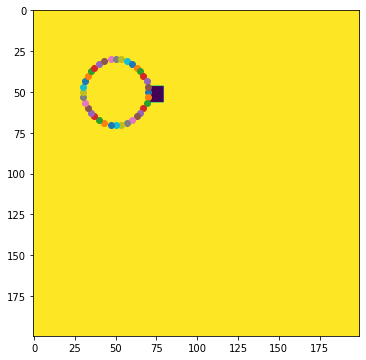

In [ ]:
# Example of an obstacle moving dynamically in a circle
a = 0
size = 10 
pos_x = 50
pos_y = 50
angle_V = np.arange(0,360,10)
R = 20
for angle in angle_V:
    x = pos_x + R * math.sin(math.pi * 2 * angle / 360)
    y = pos_y + R * math.cos(math.pi * 2 * angle / 360)
    person=  np.array([[int(np.round(x)), int(np.round(y))]])
    remind = np.zeros((1,2))
    remind = person
    mission_space = np.ones((200, 200))*(-1)
    mission_space[person[0][0]:person[0][0] + size ,person[0][1] :person[0][1] + size] = -2
    plt.scatter(person[0][1] ,person[0][0])
plt.imshow(mission_space)

In [ ]:
'''
# Every agent has a different goal position and has to avoid dynamic obstacles (could be a person or other agents)
K = 0.6
p = agents =  np.array([[25, 25], [175, 3], [3, 175],[175, 175]])
Sensor_sigma = 0.05
var_laser = 0.05
_,_,pdf = pdf_creation(150,175)
p_Kest = np.zeros((len(p), 2))
P_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(4)
Sigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma
# Dynamic matrices
A = np.identity(4)
B = np.identity(4)  # input matrix
G = np.array([[1,1],[1,1],[1,1],[1,1]])
Z = np.zeros((4,2))
C = np.zeros((4,4))
P_Kest_pred = np.zeros((4,4))
p_Kest_pred = np.zeros((4,2))
S = np.zeros((4,4))
W = np.zeros((4,4))
ModelNoiseSigma = 0.05
cor_var = 1
mission_space = np.ones((200, 200))*(-1)

iteration = 1
Rs = 15
angle_V = np.arange(0,360,5)
pos_x = 50
pos_y = 50
size = 18
R = 10

for k in range(30):
    mission_space = np.ones((200, 200))*(-1)
    x = pos_x + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y = pos_y + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person =  np.array([[int(np.round(x)), int(np.round(y))]])
    mission_space[person[0][0]:person[0][0] + size, person[0][1]:person[0][1] + size] = -2
    mission_space = Voronoi_noise(Rs,p,var_laser)
    centroids = np.zeros((4,2))
    for n in range(agents.shape[0]):
        if   n == 0:
            _,_,pdf = pdf_creation(175,175)
        elif n == 1:
            _,_,pdf = pdf_creation(50,50)
        elif n == 2:
            _,_,pdf = pdf_creation(50,50)
        elif n == 3:
            _,_,pdf = pdf_creation(50,50)
   
        centroids[n],pdf = centroids_avoidance_5(n,pdf,Rs,cor_var)

    for i in range (iteration):
        u = - K * (p - centroids)
        p,p_Kest,P_Kest,P_Kest_pred,p_Kest_pred,pm,W,S = Kalman_filter(u,p,p_Kest,P_Kest)

    plt.scatter(person[0][1] ,person[0][0], marker = '*', color = 'red') 
    plt.scatter(p[:,0], p[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+')
plt.imshow(mission_space)
plt.show()
'''

"\n# Every agent has a different goal position and has to avoid dynamic obstacles (could be a person or other agents)\nK = 0.6\np = agents =  np.array([[25, 25], [175, 3], [3, 175],[175, 175]])\nSensor_sigma = 0.05\nvar_laser = 0.05\n_,_,pdf = pdf_creation(150,175)\np_Kest = np.zeros((len(p), 2))\nP_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance\nH_k = np.identity(4)\nSigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma\n# Dynamic matrices\nA = np.identity(4)\nB = np.identity(4)  # input matrix\nG = np.array([[1,1],[1,1],[1,1],[1,1]])\nZ = np.zeros((4,2))\nC = np.zeros((4,4))\nP_Kest_pred = np.zeros((4,4))\np_Kest_pred = np.zeros((4,2))\nS = np.zeros((4,4))\nW = np.zeros((4,4))\nModelNoiseSigma = 0.05\ncor_var = 1\nmission_space = np.ones((200, 200))*(-1)\n\niteration = 1\nRs = 15\nangle_V = np.arange(0,360,5)\npos_x = 5

In [ ]:
'''
# Every agent has a different goal position and has to avoid multiple dynamic obstacles and the other agents
K = 0.6
p = agents =  np.array([[25, 25], [175, 3], [3, 175],[175, 175]])
Sensor_sigma = 0.05
var_laser = 0.05
_,_,pdf = pdf_creation(150,175)
p_Kest = np.zeros((len(p), 2))
P_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance
H_k = np.identity(4)
Sigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma
# Dynamic matrices
A = np.identity(4)
B = np.identity(4)  # input matrix
G = np.array([[1,1],[1,1],[1,1],[1,1]])
Z = np.zeros((4,2))
C = np.zeros((4,4))
P_Kest_pred = np.zeros((4,4))
p_Kest_pred = np.zeros((4,2))
S = np.zeros((4,4))
W = np.zeros((4,4))
ModelNoiseSigma = 0.05
cor_var = 0.5

mission_space = np.ones((200, 200))*(-1)
iteration = 1
Rs = 12
angle_V = np.arange(0,500,10)
pos_x = 50
pos_y = 50
pos_x1 = 125
pos_y1= 125
pos_x2 = 50
pos_y2= 125
pos_x3 = 125
pos_y3= 40
pos_x4 = 75
pos_y4= 90

size = 6
R = 10

for k in range(50):
    mission_space = np.ones((200, 200))*(-1)
    x = pos_x + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y = pos_y + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person=  np.array([[int(np.round(x)), int(np.round(y))]])
    mission_space[person[0][0]-size:person[0][0] + size,person[0][1] - size:person[0][1] + size ] = -2
    x1 = pos_x1 + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y1 = pos_y1 + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person1=  np.array([[int(np.round(x1)), int(np.round(y1))]])
    mission_space[person1[0][0]-size:person1[0][0] + size,person1[0][1] - size:person1[0][1] + size ] = -2
    x2 = pos_x2 + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y2 = pos_y2 + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person2=  np.array([[int(np.round(x2)), int(np.round(y2))]])
    mission_space[person2[0][0]-size:person2[0][0] + size,person2[0][1] - size:person2[0][1] + size ] = -2
    x3 = pos_x3 + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y3 = pos_y3 + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person3=  np.array([[int(np.round(x3)), int(np.round(y3))]])
    mission_space[person3[0][0]-size:person3[0][0] + size,person3[0][1] - size:person3[0][1] + size ] = -2
    x4 = pos_x4 + R * math.sin(math.pi * 2 * angle_V[k] / 360)
    y4 = pos_y4 + R * math.cos(math.pi * 2 * angle_V[k] / 360)
    person4=  np.array([[int(np.round(x4)), int(np.round(y4))]])
    mission_space[person4[0][0]-size:person4[0][0] + size,person4[0][1] - size:person4[0][1] + size ] = -2
    
    mission_space = Voronoi_noise(Rs,p,var_laser)
    centroids = np.zeros((4,2))

    for n in range(agents.shape[0]):
        if  n == 0:
            _,_,pdf = pdf_creation(175,175)
        elif n == 1:
            _,_,pdf = pdf_creation(50,50)
        elif n == 2:
            _,_,pdf = pdf_creation(50,50)
        elif n == 3:
            _,_,pdf = pdf_creation(50,50)
            
        centroids[n],pdf = centroids_avoidance_5(n,pdf,Rs,cor_var)

    for i in range (iteration):
        u = - K * (p - centroids)
        p,p_Kest,P_Kest,P_Kest_pred,p_Kest_pred,pm,W,S = Kalman_filter(u,p,p_Kest,P_Kest)

    plt.figure(figsize = (5,5))
    plt.scatter(person[0][1] ,person[0][0], marker = '*') 
    plt.scatter(person1[0][1] ,person1[0][0], marker = '*')
    plt.scatter(person2[0][1] ,person2[0][0], marker = '*')
    plt.scatter(person3[0][1] ,person3[0][0], marker = '*')
    plt.scatter(person4[0][1] ,person4[0][0], marker = '*')   
    plt.scatter(p[:,0], p[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+')
    plt.imshow(mission_space,aspect = "auto")
plt.show()
'''

'\n# Every agent has a different goal position and has to avoid multiple dynamic obstacles and the other agents\nK = 0.6\np = agents =  np.array([[25, 25], [175, 3], [3, 175],[175, 175]])\nSensor_sigma = 0.05\nvar_laser = 0.05\n_,_,pdf = pdf_creation(150,175)\np_Kest = np.zeros((len(p), 2))\nP_Kest = np.diag([100**2, 100**2, 100**2, 100**2])  # Estimated uncertainty - initialize covariance\nH_k = np.identity(4)\nSigma = np.array([[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma],[Sensor_sigma,Sensor_sigma]]) # sigma values depend on sensor sigma\n# Dynamic matrices\nA = np.identity(4)\nB = np.identity(4)  # input matrix\nG = np.array([[1,1],[1,1],[1,1],[1,1]])\nZ = np.zeros((4,2))\nC = np.zeros((4,4))\nP_Kest_pred = np.zeros((4,4))\np_Kest_pred = np.zeros((4,2))\nS = np.zeros((4,4))\nW = np.zeros((4,4))\nModelNoiseSigma = 0.05\ncor_var = 0.5\n\nmission_space = np.ones((200, 200))*(-1)\niteration = 1\nRs = 12\nangle_V = np.arange(0,500,10)\npos_x = 50\n